In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define Linear Regression  Model

class LinearRegression(tf.keras.Model):
  def __init__(self, num_inputs, num_outputs):
    super(LinearRegression, self).__init__()
    self.W = tf.Variable(
        tf.random_normal_initializer()((num_inputs, num_outputs)))
    self.b = tf.Variable(tf.zeros(num_outputs))
    self.params = [self.W, self.b]

  def call(self, inputs):
    return tf.matmul(inputs, self.W)+self.b

In [5]:
#create a dataset
N = 100
D = 1
K = 1
X = np.random.random((N,D)) * 2 - 1 # random values between -1,1
w = np.random.randn(D, K) #random weight values
b = np.random.randn() # random bias values
Y = X.dot(w) + b + np.random.randn(N, 1) * 0.1

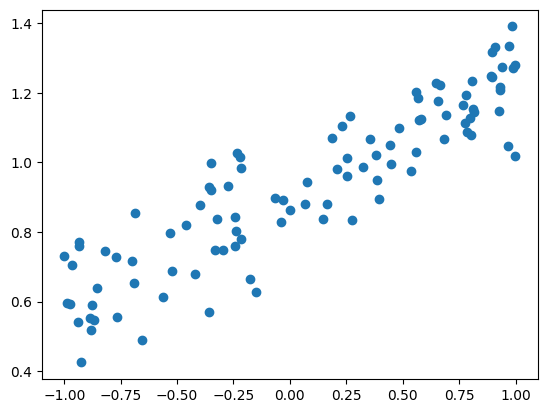

In [6]:
plt.scatter(X, Y)

In [10]:
# cast typr, otherwise tensorflow will complain
# we creating in numpy so it create doubles by default so we convert to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [11]:
#Define the loss
def get_loss(model, inputs, targets):
  predictions = model(inputs)
  error = targets - predictions
  return tf.reduce_mean(tf.square(error))

In [19]:
#Gradient function
def get_grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    #calculate the loss
    loss_value = get_loss(model, inputs, targets)
  #return gradient
  return tape.gradient(loss_value, model.params)

In [14]:
# Create and train the model
model = LinearRegression(D, K)

#print the params before training
print("Initial params")
print(model.W)
print(model.b)

Initial params
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.01011235]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [20]:
# Store the losses here
losses = []

# create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.2)

# run the training loop
for i in range(100):
  # get gradients
  grads = get_grad(model, X, Y)

  # Do one step of gradient descent : param <- learning_rate * grad
  optimizer.apply_gradients(zip(grads, model.params))

  #Store the loss
  loss = get_loss(model, X, Y)
  losses.append(loss)

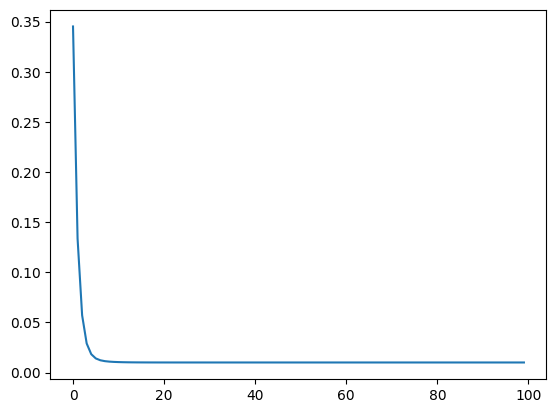

In [21]:
plt.plot(losses)

4/4 [==============================] - 0s 5ms/step


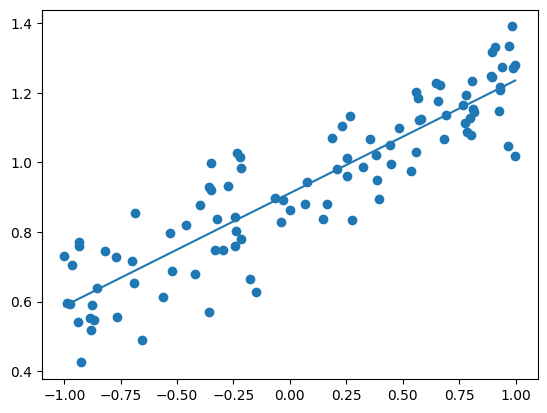

In [24]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1,1)).flatten()

plt.scatter(X, Y)# actual values
plt.plot(x_axis, y_axis) # model values (predicted)

In [25]:
print("predicted params")
print(model.W)
print(model.b)

predicted params
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.3244307]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.91166997], dtype=float32)>


In [26]:
print("true params")
w,b

true params


(array([[0.31542371]]), 0.9236465876168846)